## Analyse des échantillons


### Nombre d’échantillons

#### Nombre de polygones par classe

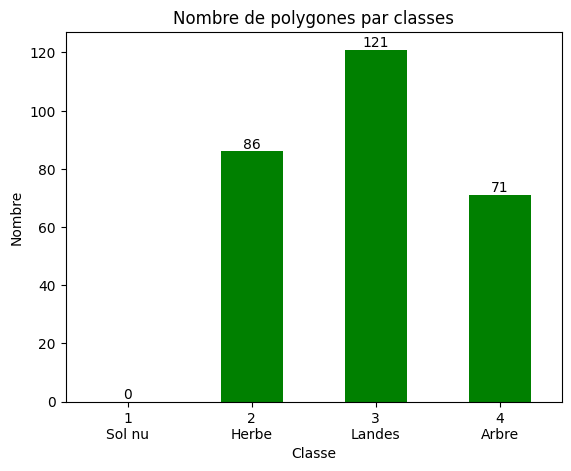

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

shp_path = os.path.join(
    "data",
    "projet_eval",
    "PI_strates_bretagne_32630.shp"
)

echantillon_shp = gpd.read_file(shp_path)

# Dictionnaire de référence car la liste des classes est connue et prévisible
labels_strates = {
    1: "Sol nu",
    2: "Herbe",
    3: "Landes",
    4: "Arbre"
}

# Compter et forcer les strates attendues
counts = (
    echantillon_shp["strate"]
    .value_counts()
    .reindex(labels_strates.keys())
    .fillna(0)
)

fig, ax = plt.subplots()
counts.plot(kind="bar", ax=ax, color="green")

# Affiche les valeurs
for i, val in enumerate(counts):
    ax.text(i, val, int(val), ha="center", va="bottom") 

# Labels de l'axe X depuis le dictionnaire
ax.set_xticklabels([f"{s}\n{labels_strates[s]}" for s in counts.index], rotation=0)

# Titres graphique et axes
ax.set_title("Nombre de polygones par classes")
ax.set_xlabel("Classe")
ax.set_ylabel("Nombre")

# Sortie
output_dir = os.path.join("results", "figure")

os.makedirs(output_dir,exist_ok=True) # Crée le dossier s'il n'existe pas

output_path = os.path.join(output_dir, "diag_baton_nb_poly_by_class.png")

plt.savefig(output_path)

plt.show()

On remarque que les landes sont la classe majoritaire parmi les polygones servant d'échantillons, viennent ensuite l'herbe et les arbres.

En revanche, **aucun polygone n'est classé en sol nu**. Cela pourra poser des problèmes plus tard, notamment lors de la classification supervisée, en créant des **biais**. En effet, sans échantillon de référence dans cette classe, les modèles vont probablement avoir du mal à apprendre puis reconnaître ce qui correspond effectivement à du sol nu.

#### Nombre de pixels par classe

On vérifie d'abord si tous les fichiers de travail (les 11 bandes + le .shp d'échantillons) sont bien projetés dans le même CRS.

In [10]:
from my_function import verif_crs

raster_dir = "data/projet_eval"
bands = ["B02","B03","B04","B05","B06","B07","B08","B8A","B11","B12"]
shp_path = "data/projet_eval/PI_strates_bretagne_32630.shp"

message = verif_crs(raster_dir, bands, shp_path)
print(message)

✅ Tous les CRS sont identiques (EPSG:32630)


### Phénologie des strates, mise en évidence des landes

## Production d'une carte de strates à l'échelle du pixel

### Choix du classifieur et sa paramétrisation

### Stratégie de validation

### Contribution des variables

### Production des cartes finales

### Analyse des résultats